In [1]:
# Task 3: Linear Regression – Airlines Dataset

In [2]:
# Import all the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load the dataset

df = pd.read_csv('airlines_flights_data.csv')

In [4]:
# Drop index column because it is not useful

df.drop(columns=['index'], inplace=True)

In [5]:
# Check for null values

print("\n Missing values per column:")
print(df.isnull().sum())


 Missing values per column:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [6]:
# Handle Missing Values

# For numerical columns we use mean or median
df['duration'].fillna(df['duration'].mean(), inplace=True)
df['days_left'].fillna(df['days_left'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# For categorical columns we use mode (i.e., most frequent value)
categorical_cols_with_nulls = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for col in categorical_cols_with_nulls:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-148463164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mean(), inplace=True)
/tmp/ipython-input-148463164.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [7]:
# Recheck for the missing values

print("\n Missing values after handling:")
print(df.isnull().sum())


 Missing values after handling:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [9]:
# Encode Categorical Variables (One-hot)
df_encoded = pd.get_dummies(df, columns=[
    "airline", "flight", "source_city", "departure_time",
    "stops", "arrival_time", "destination_city", "class"
], drop_first=True)

In [10]:
# Define Features and Target
X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training data - 80% , testing data - 20%
#it can also be split into 70% and 30% also

In [13]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make Predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print("\n Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


 Evaluation Metrics:
MAE: 4253.95
MSE: 38405297.73
R^2 Score: 0.9255


In [18]:
# Coefficient Interpretation
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

In [19]:
print("\n Top 10 Most Influential Features:")
print(coef_df.head(10))


 Top 10 Most Influential Features:
             Feature   Coefficient
1589   class_Economy -44847.737517
652    flight_6E-864  14492.408679
917   flight_AI-9915  13101.671170
699    flight_6E-972  12821.756407
628    flight_6E-781  12627.191489
506   flight_6E-6565  12570.326258
189   flight_6E-2914  12335.742244
143   flight_6E-2176  12098.087877
810    flight_AI-645 -12054.066863
93    flight_6E-2015  11517.462454


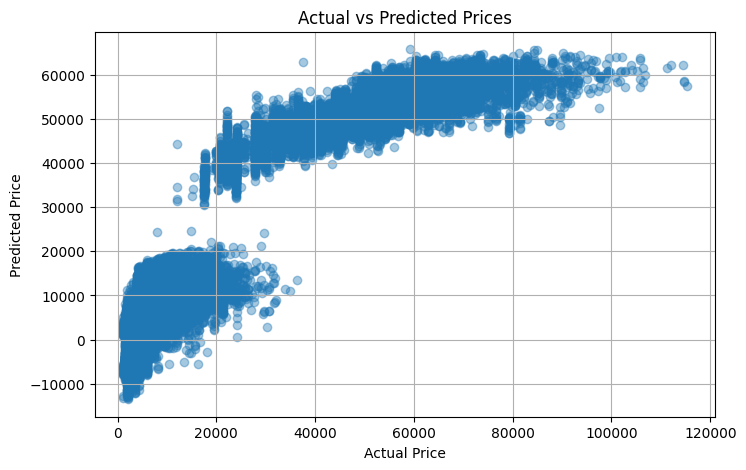

In [20]:
# Plotting predicted vs actual values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()